<a href="https://colab.research.google.com/github/Huyu2239/Prog2kakushin/blob/work3/work3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第14回(1/19) turtle, opencv
- キャンパスのサイズを受け取る
- 入力されたコマンドどおりに描画する
- そのキャンパスを画像として保存
- モノクロに変換し、画素数をグラフとして出力

モジュールセットアップ

In [45]:
!pip3 install ColabTurtlePlus
from ColabTurtlePlus.Turtle import *
!pip3 install svglib
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPM
import os
import sys
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


画像のサイズを受け取り

In [68]:
input_str = input("描画する画像のサイズを整数で入力してください。: ")

if len(input_str.split()) != 2:
    print(f"Error:{len(input_str.split())}つの要素が渡されました。2つ渡してください。")
    sys.exit()

if "." in input_str:
    print("Error:小数が渡されました。整数を入力してください。")
    sys.exit()

try:
    x, y = map(int, input_str.split())
except ValueError as e:
    if str(e).startswith("invalid literal for int() with base 10:"):
        print("Error:文字列が渡されました。整数を入力してください。")
    else:
        print(e, type(e))
    sys.exit()
except Exception as e:
    print(e, type(e))
    sys.exit()

print(x, y)
clearscreen()
setup(x, y)

描画する画像のサイズを整数で入力してください。: 400 400
400 400


コード受け取り
```
注意点
・筆は Turtle のみ
・最低1つ変数名を turtle に
・Turtle.speed を大きく設定すると、バグで線が出る可能性あり(時間があればissue出します)
```

In [69]:
# ここに描きたいものを入力
turtle = Turtle()
turtle.shape("turtle")
turtle.speed(13)
turtle.pencolor("red")
turtle.fillcolor("yellow")

for _ in range(6):
    turtle.forward(150)
    turtle.backward(150)
    turtle.right(60)


r = 150
l = 150
for _ in range(10):
    turtle.goto(0,0)
    turtle.forward(r)
    turtle.right(120)
    for __ in range(6):
        turtle.forward(l)
        turtle.right(60)
    l -= 20
    r -= 20


pngファイル化＆表示

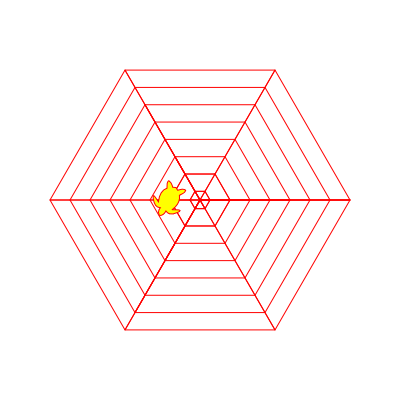

In [70]:
turtle._screen.saveSVG(file="tmp.svg", turtle=True)
file_path = "tmp.svg"
drawing = svg2rlg(file_path)
renderPM.drawToFile(drawing, "turtle.png", fmt="PNG")
os.remove("tmp.svg")

img = cv2.imread("turtle.png")
if img is None:
  sys.exit("Error: file not found")

cv2_imshow(img)

モノクロにして、画素数をグラフ化して表示

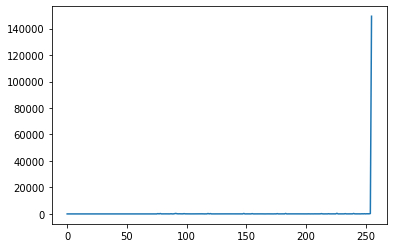

In [71]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
array = np.zeros(256)
h = img_gray.shape[0]
w = img_gray.shape[1]

for iy in range(h):
    for ix in range(w):
        array[img_gray[iy,ix]] += 1

plt.plot(array)
plt.show()